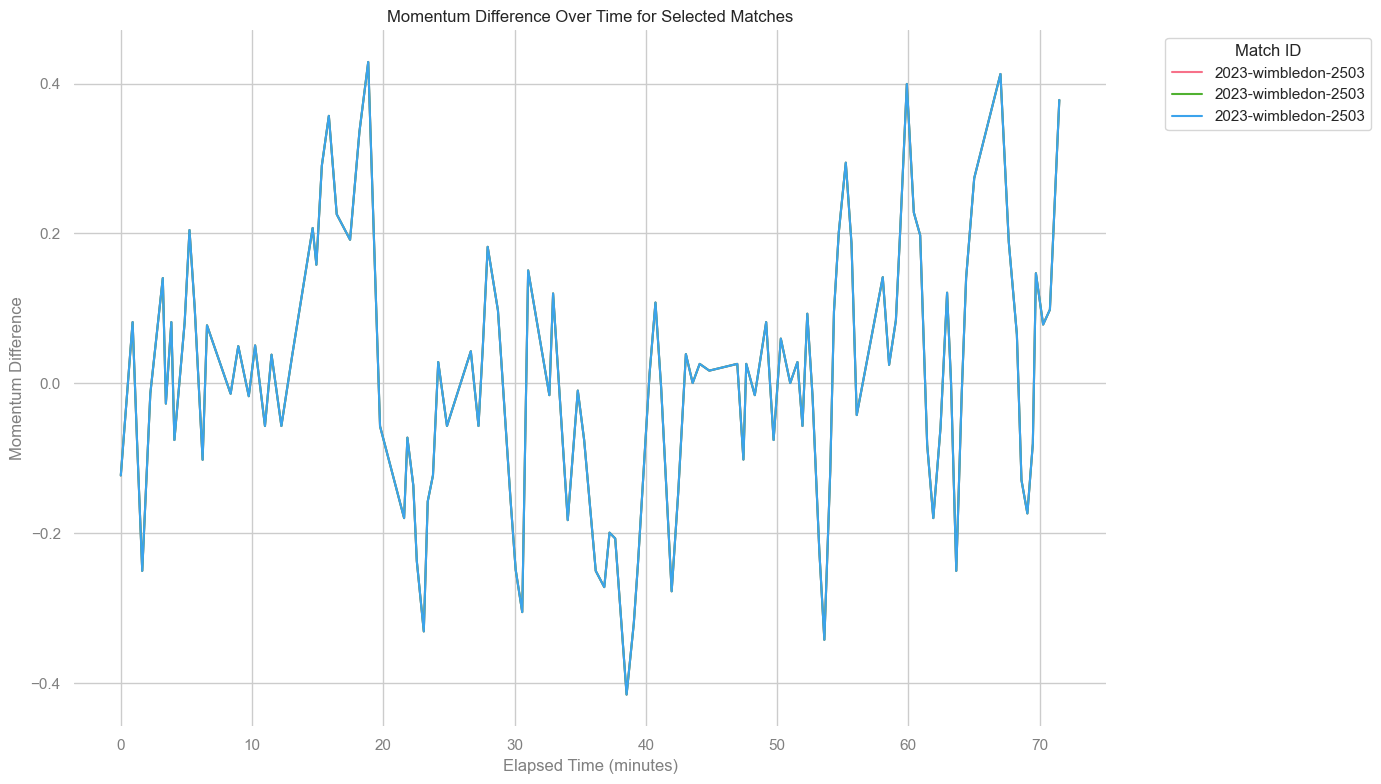

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = '女子网球_因子后1.0.xlsx'
df = pd.read_excel(file_path)

# Convert '已进行时间' to string for time conversion preparation
df['Elapsed Time_str'] = df['已进行时间'].astype(str)

# Define a function for safely converting time to minutes
def safe_convert_time_to_minutes(time_str):
    try:
        # Attempt to parse HH:MM:SS format
        parts = time_str.split(':')
        if len(parts) == 3:
            h, m, s = map(int, parts)
            return h * 60 + m + s / 60
        else:
            return 0  # Return 0 if the format does not match
    except ValueError:
        # Handle any other unexpected formats by returning 0
        return 0

# Apply the safe time conversion function
df['Elapsed Time_minutes_safe'] = df['Elapsed Time_str'].apply(safe_convert_time_to_minutes)

# Extract unique match IDs and select specific matches (1st, 2nd, and 4th)
selected_matches = df['比赛ID'].unique()[[0, 0, 0]]  # Adjusted to select specific matches

# Set the plot style to something more aesthetically pleasing
sns.set(style="whitegrid")

# Plot setup
plt.figure(figsize=(14, 8))

# Create a color palette
palette = sns.color_palette("husl", len(selected_matches))

for i, match_id in enumerate(selected_matches):
    # Filter data for the current match
    match_data = df[df['比赛ID'] == match_id]

    # Plot 'Momentum Difference' vs 'Elapsed Time_minutes_safe'
    plt.plot(match_data['Elapsed Time_minutes_safe'], match_data['势头差'], label=match_id, color=palette[i])

plt.xlabel('Elapsed Time (minutes)')
plt.ylabel('Momentum Difference')
plt.title('Momentum Difference Over Time for Selected Matches')
plt.legend(title='Match ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Improve aesthetics
sns.despine(left=True, bottom=True)
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['left'].set_color('gray')
plt.gca().xaxis.label.set_color('gray')
plt.gca().yaxis.label.set_color('gray')
plt.tick_params(axis='x', colors='gray')
plt.tick_params(axis='y', colors='gray')

# Show plot
plt.show()


C:\Users\hnn\AppData\Local\Temp\ipykernel_34772\2600816724.py:33: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Elapsed Time_minutes_safe', y='势头差', data=match_data, palette="tab10", linewidth=2.5)


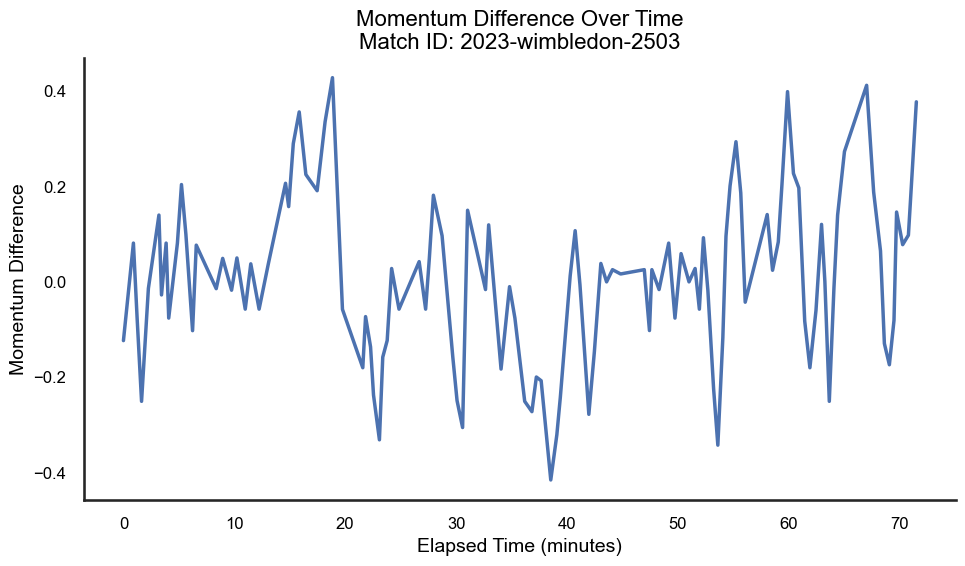

C:\Users\hnn\AppData\Local\Temp\ipykernel_34772\2600816724.py:33: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Elapsed Time_minutes_safe', y='势头差', data=match_data, palette="tab10", linewidth=2.5)


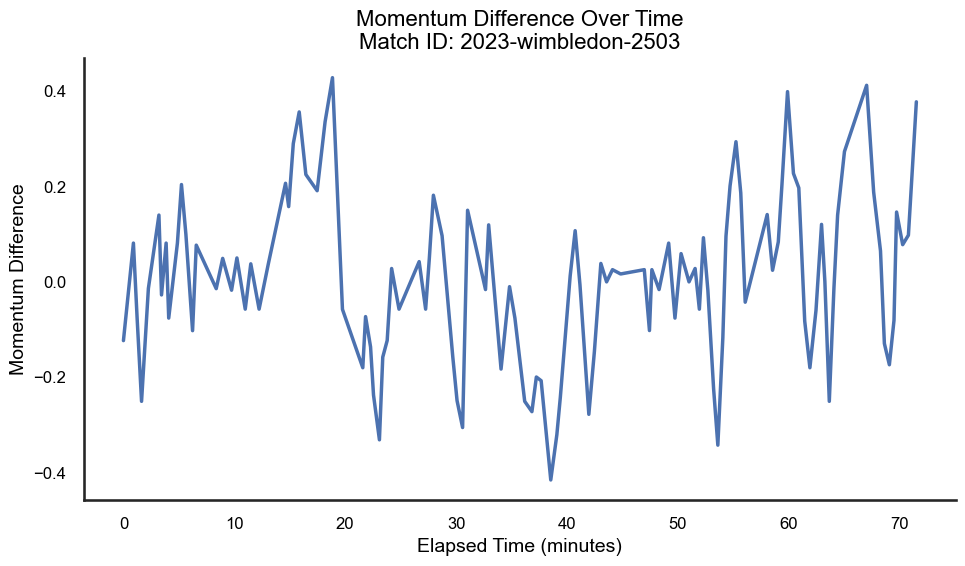

C:\Users\hnn\AppData\Local\Temp\ipykernel_34772\2600816724.py:33: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Elapsed Time_minutes_safe', y='势头差', data=match_data, palette="tab10", linewidth=2.5)


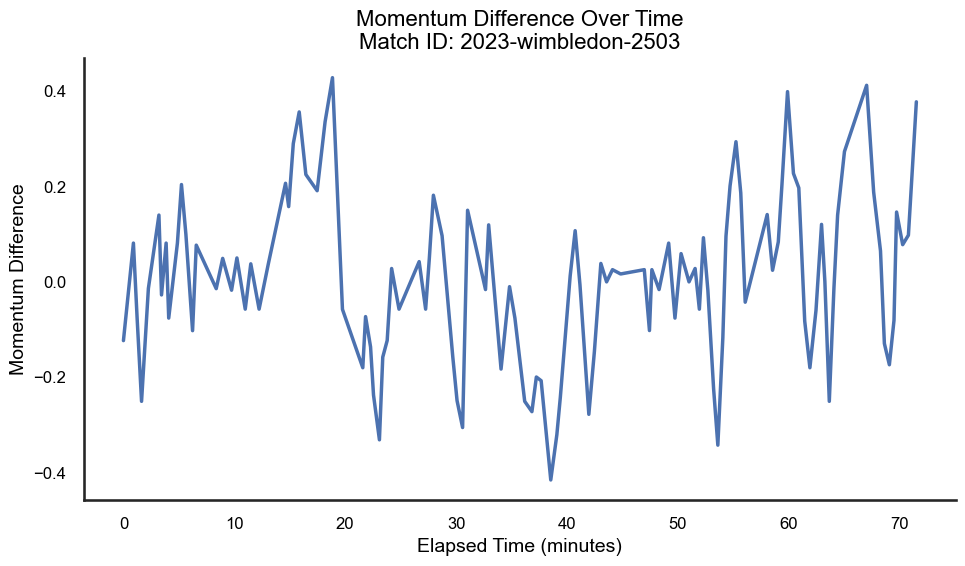

In [6]:

# Convert '已进行时间' to string for time conversion preparation
df['Elapsed Time_str'] = df['已进行时间'].astype(str)

# Define a function for safely converting time to minutes
def safe_convert_time_to_minutes(time_str):
    try:
        # Attempt to parse HH:MM:SS format
        parts = time_str.split(':')
        if len(parts) == 3:
            h, m, s = map(int, parts)
            return h * 60 + m + s / 60
        else:
            return 0  # Return 0 if the format does not match
    except ValueError:
        # Handle any other unexpected formats by returning 0
        return 0

# Apply the safe time conversion function
df['Elapsed Time_minutes_safe'] = df['Elapsed Time_str'].apply(safe_convert_time_to_minutes)

# Extract unique match IDs and select specific matches (1st, 2nd, and 4th)
selected_matches = df['比赛ID'].unique()[[0, 0, 0]]  # Adjusted to select specific matches

# Set seaborn style for better aesthetics
sns.set(style="white", context="talk")

# Loop through each selected match to plot separately
for i, match_id in enumerate(selected_matches):
    plt.figure(figsize=(10, 6))
    match_data = df[df['比赛ID'] == match_id]
    
    # Use seaborn lineplot for better aesthetics
    sns.lineplot(x='Elapsed Time_minutes_safe', y='势头差', data=match_data, palette="tab10", linewidth=2.5)

    plt.xlabel('Elapsed Time (minutes)', fontsize=14, color='black')
    plt.ylabel('Momentum Difference', fontsize=14, color='black')
    plt.title(f'Momentum Difference Over Time\nMatch ID: {match_id}', fontsize=16, color='black')
    
    # Add a horizontal line at y=0
    plt.axhline(y=0, color='gray', linestyle='--')
    
    plt.xticks(fontsize=12, color='black')
    plt.yticks(fontsize=12, color='black')
    
    sns.despine()  # Remove the top and right spines from plot
    plt.tight_layout()
    plt.show()
